In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# CSV 파일 불러오기


In [41]:
df = pd.read_csv("C:/Users/ghom9/Downloads/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 불필요한 칼람 제거

In [42]:
columns_to_delete = ['id'] # 삭제할 컬럼 리스트

df = df.drop(columns=columns_to_delete)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 결측치 확인

In [43]:
print(df.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


# 레이블 확인

In [44]:
df["Rings"].value_counts() #레이블 확인 - 불균형확인, 값의 분포 

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

# 라벨 엔코딩

In [45]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 상관관계 행렬
#### -가장 밑에 줄 레이블과 관련된 값 확인 

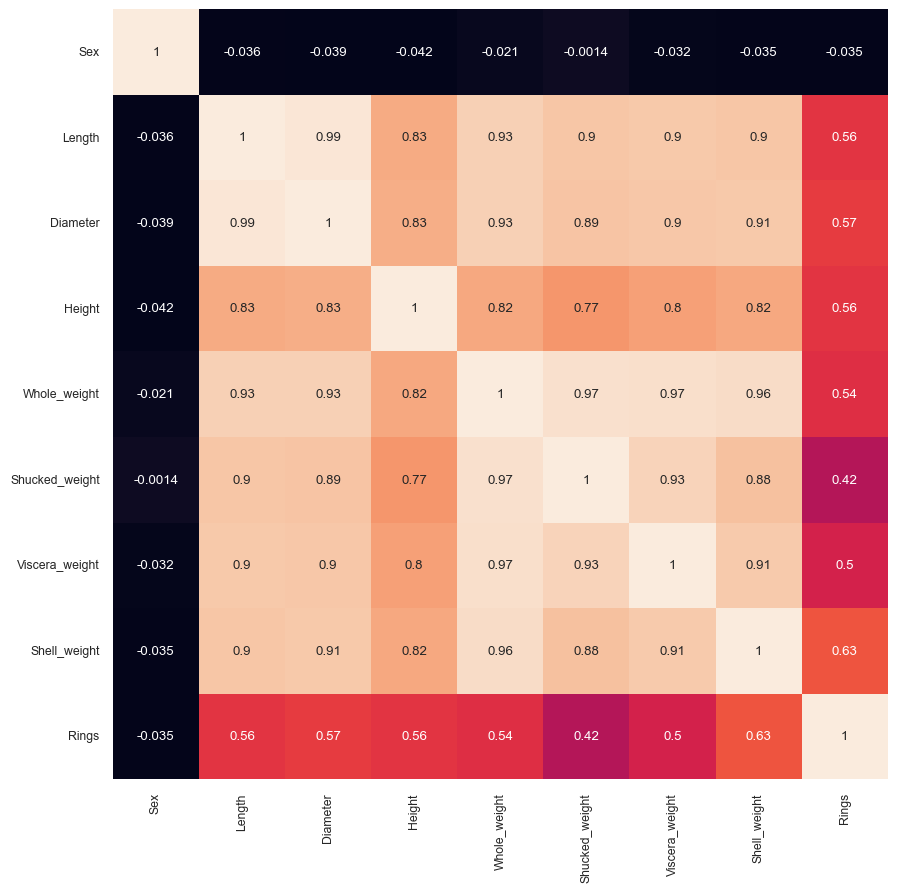

In [46]:
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 특징, 타겟 데이터 입력

In [47]:
# .values를 붙여 pandas를 넘파이로 변환 
# 넘파이로 변환하는 이유 -> 스케일링을 하기 위해서 

X = df.drop('Rings', axis=1).values
y = df['Rings'].values

In [48]:
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [49]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

# 스케일링

In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
X

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

# 훈련, 테스트 데이터

In [ ]:
# test_size=0.2 - 훈련 데이터 80%, 테스트 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Shape 확인

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


# Linear Regression

In [30]:
# 선형회귀 
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 5.104186010193345
평균제곱근오차 5.104186010193345
평균제곱근오차 5.104186010193348


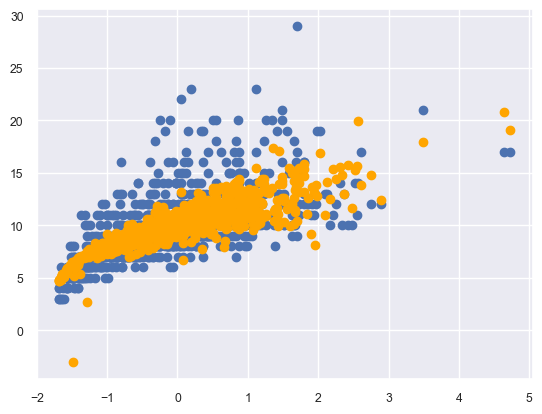

In [53]:
# 넘파이 배열일 경우 컬럼 인덱스로 접근
shell_weight_idx = np.where(df.columns == 'Shell_weight')[0][0]  # 몇 번째 컬럼인지 찾기
plt.scatter(X_test[:, shell_weight_idx], y_test, label='y_test')
plt.scatter(X_test[:, shell_weight_idx], ly_preds, c='orange', label='ly_preds')
plt.show()

# DT Regression

In [54]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.803827751196172


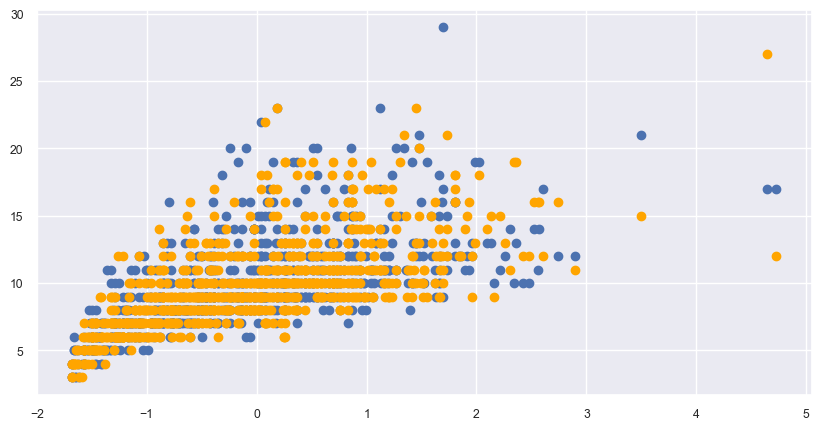

In [55]:
plt.figure(figsize=(10,5))
shell_weight_idx = np.where(df.columns == 'Shell_weight')[0][0]  # 몇 번째 컬럼인지 찾기
plt.scatter(X_test[:, shell_weight_idx], y_test, label='y_test')
plt.scatter(X_test[:, shell_weight_idx], dy_preds, c='orange', label='dy_preds')
plt.show()  

# RF Regression

In [56]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.678530502392345


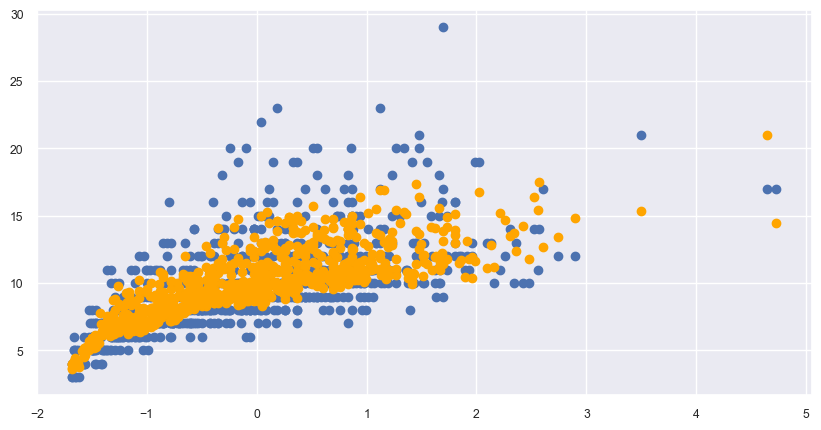

In [57]:
plt.figure(figsize=(10,5))
shell_weight_idx = np.where(df.columns == 'Shell_weight')[0][0]  # 몇 번째 컬럼인지 찾기
plt.scatter(X_test[:, shell_weight_idx], y_test, label='y_test')
plt.scatter(X_test[:, shell_weight_idx], ry_preds, c='orange', label='ry_preds')
plt.show()

# SVM Regression

In [58]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.318328485639149


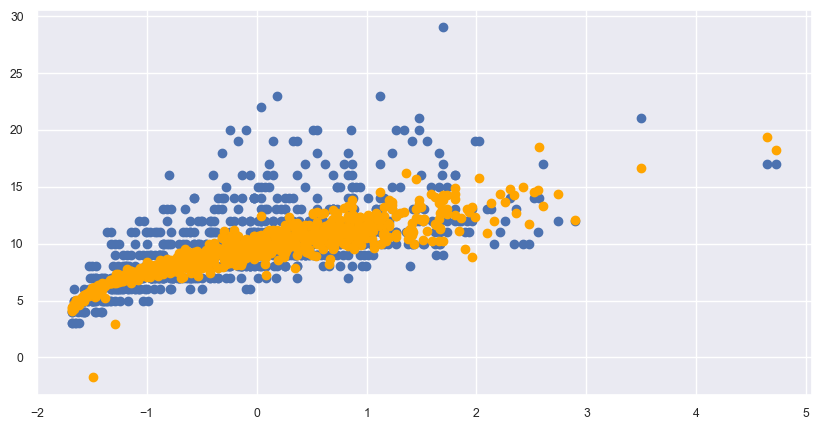

In [59]:
plt.figure(figsize=(10,5))
shell_weight_idx = np.where(df.columns == 'Shell_weight')[0][0]  # 몇 번째 컬럼인지 찾기
plt.scatter(X_test[:, shell_weight_idx], y_test, label='y_test')
plt.scatter(X_test[:, shell_weight_idx], ry_preds, c='orange', label='ry_preds')
plt.show() 